In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

### **Loading the Housing Price Prediction Dataset**

* Using housing price prediction dataset, we will be training the multivairate linear regression model to predict the price of house based on house features like area, number of bedrooms, number of stories etc.

In [6]:
# df=pd.read_csv(r"C:\Users\acer\Desktop\Machine_learning\data_files\house_prediction2.csv")
df=pd.read_csv("housing_price_prediction.csv")
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


Here, we could see the dataset consists both numeric and categorical features.

**Study the data statistics**

In [7]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


Here, we could see the maximum and minimum value of different features are of different range.

**Check for missing values**

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


Here we could see there are no missing values in all feature columns as 545 out of 545 are non-null.

In [9]:
df=pd.get_dummies(df,drop_first=True)
df

,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,2,True,False,False,False,True,True,False,False
1,12250000,8960,4,4,4,3,True,False,False,False,True,False,False,False
2,12250000,9960,3,2,2,2,True,False,True,False,False,True,True,False
3,12215000,7500,4,2,2,3,True,False,True,False,True,True,False,False
4,11410000,7420,4,1,2,2,True,True,True,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,2,True,False,True,False,False,False,False,True
541,1767150,2400,3,1,1,0,False,False,False,False,False,False,True,False
542,1750000,3620,2,1,1,0,True,False,False,False,False,False,False,True
543,1750000,2910,3,1,1,0,False,False,False,False,False,False,False,False


Converts categorical columns (like strings) into one-hot encoded columns.

**Separating the Input features and output target variable**

In [10]:
# All the columns except 'price' are our input features
X=df.drop('price',axis=1).values
X

array([[7420, 4, 2, ..., True, False, False],
       [8960, 4, 4, ..., False, False, False],
       [9960, 3, 2, ..., True, True, False],
       ...,
       [3620, 2, 1, ..., False, False, True],
       [2910, 3, 1, ..., False, False, False],
       [3850, 3, 1, ..., False, False, True]], dtype=object)

In [11]:
# 'price' is our target variable
y=df['price'].values
y

array([13300000, 12250000, 12250000, 12215000, 11410000, 10850000,
       10150000, 10150000,  9870000,  9800000,  9800000,  9681000,
        9310000,  9240000,  9240000,  9100000,  9100000,  8960000,
        8890000,  8855000,  8750000,  8680000,  8645000,  8645000,
        8575000,  8540000,  8463000,  8400000,  8400000,  8400000,
        8400000,  8400000,  8295000,  8190000,  8120000,  8080940,
        8043000,  7980000,  7962500,  7910000,  7875000,  7840000,
        7700000,  7700000,  7560000,  7560000,  7525000,  7490000,
        7455000,  7420000,  7420000,  7420000,  7350000,  7350000,
        7350000,  7350000,  7343000,  7245000,  7210000,  7210000,
        7140000,  7070000,  7070000,  7035000,  7000000,  6930000,
        6930000,  6895000,  6860000,  6790000,  6790000,  6755000,
        6720000,  6685000,  6650000,  6650000,  6650000,  6650000,
        6650000,  6650000,  6629000,  6615000,  6615000,  6580000,
        6510000,  6510000,  6510000,  6475000,  6475000,  6440

In [12]:
print(f"Dimension of feature matrix: {X.shape}")
print(f"Dimension of target vector: {y.shape}")

Dimension of feature matrix: (545, 13)
Dimension of target vector: (545,)


Here, we could see there are 545 total examples in dataset and we will be using 13 different features.We should reshape the label vector to pervent matrix dimensional confict.

**Reshaping the label vector**

In [13]:
y=y.reshape(-1,1) # -1 will tell numpy to infer the number of rows automatically and we have specified column as 1
print(f"Dimension of target vector: {y.shape}")

Dimension of target vector: (545, 1)


**Splitting the entire dataset into train, validation and test sets**

* We will randomly split our dataset both X and y into train, validation and test sets in the proportion of 60:20:20 respectively.

* For this we will use train_test_split() function from sklearn library.

* We will achieve this task in two steps:

    a. First split the entire dataset into train and validation set in the ratio 60:40.  
    
    b. Then, split the validation set into validation set and test set in the ratio 50:50

In [15]:
# a. Splitting the data into train, and validation set
X_train,X_val,y_train,y_val=train_test_split(X,y,test_size=0.4,random_state=42)
# b. Splitting the validation set into validation and test set

X_val,X_test,y_val,y_test=train_test_split(X_val,y_val,test_size=0.5,random_state=42)

In [16]:
print(f"Dimension of training feature matrix: {X_train.shape}")
print(f"Dimension of training label vector: {y_train.shape}")
print("=" * 50)
print(f"Dimension of validation feature matrix: {X_val.shape}")
print(f"Dimension of validation label vector: {y_val.shape}")
print("=" * 50)
print(f"Dimension of testing feature matrix: {X_test.shape}")
print(f"Dimension of testing label vector: {y_test.shape}")

Dimension of training feature matrix: (327, 13)
Dimension of training label vector: (327, 1)
Dimension of validation feature matrix: (109, 13)
Dimension of validation label vector: (109, 1)
Dimension of testing feature matrix: (109, 13)
Dimension of testing label vector: (109, 1)


**Feature Scaling**
* Can be done in two ways:

    1. Feature Normalization:
        * Normalization is a scaling technique in which values are shifted and rescaled so that they end up ranging between 0 and 1. 
        
        * It is also known as Min-Max scaling.

        $$
            X_{\text{norm}} = \frac{X - X_{\text{min}}}{X_{\text{max}} - X_{\text{min}}}
        
        $$
    2. Feature Standardization
        * Standardization is scaling technique where the values are centered around the mean with a unit standard deviation. 
        
        * This means that the mean of the feature becomes zero, and the resultant distribution has a unit standard deviation.

        $$
            X_{\text{std}} = \frac{X - \mu}{\sigma}
        $$

* For feature scaling we will use **TRAINING SET** to compute X_min, X_max (for normalization) and X_mean and X_std (for standardization).

* Then the same X_min, X_max, X_mean or X_std values from training sets are used for scaling features from validation and test sets.

* We will use feature standardization in this tutorial.

In [17]:
def training_feature_standarization(X_train):
    # Calculate mean and standard deviation from the training set
    X_train_mean = X_train.mean(axis=0)  # axis=0 means columnwise operation
    X_train_std = X_train.astype(np.float32).std(axis=0)
    #we we have TRUE FALSE in our data when standard deviation is calculated root gives error so first we convert it to float
    
    # Reshaping the mean and standard deviation
    X_train_mean = X_train_mean.reshape(1, -1)
    X_train_std = X_train_std.reshape(1, -1)

    # Standardize the training set

    X_train_scaled= (X_train-X_train_mean)/X_train_std

    return X_train_mean,X_train_std,X_train_scaled






In [18]:
# Function to standardize the test features
# This same function can be used to standardize the validation sets

def test_feature_standarization(X_test,X_train_mean,X_train_std):
        X_test_scaled= (X_test-X_train_mean)/X_train_std
        return X_test_scaled
    


**Building Linear Regression Model**


In [19]:
class LinearRegression:
    def __init__(self,lr,epochs):
        self.lr=lr
        self.epochs=epochs
        self.betas=None

        #for loss history
        self.loss_history=[]

    def MSE_loss(self,y_pred,y):
        m=len(y)
        loss=np.sum((y_pred-y)**2)/(2*m)
        return loss


    def fit(self,X_train,y_train):
        X_train=np.insert(X_train,0,1,axis=1)
        gradients=[]
        self.betas=np.zeros((X_train.shape[1],1))


        for i in range(self.epochs):
            y_pred=np.dot(X_train,self.betas)
            #loss
            loss=self.MSE_loss(y_pred,y_train)
            self.loss_history.append(loss)

            #gradients
            gradients=np.dot(X_train.T,(y_pred-y_train))/X_train.shape[0]


            #update Betas
            self.betas=self.betas-self.lr*gradients

            if i%100 ==0:
                print(f"Iteration {i}:MSE LOSS = {loss}")
                print("="*50)

        return self.betas,self.loss_history

    
    def predict(self,X_test):
        X_test=np.insert(X_test,0,1,axis=1)
        return np.dot(X_test,self.betas)
      

    
                

In [20]:
print(X_train.shape)

(327, 13)


In [21]:
X_val.shape

(109, 13)

In [22]:
# Prepare training, validation and test sets by standardizing features

X_train_mean,X_train_std,X_train_scaled=training_feature_standarization(X_train)
print(X_train_scaled.shape)
print(X_train_mean.shape)
print(X_train_std.shape)

X_val_scaled = test_feature_standarization(X_val,X_train_mean, X_train_std)

X_test_scaled = test_feature_standarization(X_test,X_train_mean, X_train_std)


(327, 13)
(1, 13)
(1, 13)


In [23]:
X_test_scaled

array([[-0.8624439586819724, 0.08136402016338178, -0.5113056136469313,
        ..., -0.5313688535600584, 1.1925692969713144,
        -0.6973978886639414],
       [-0.8624439586819724, 1.4116657498346754, -0.5113056136469313,
        ..., -0.5313688535600584, 1.1925692969713144,
        -0.6973978886639414],
       [-0.7244613645952475, 0.08136402016338178, -0.5113056136469313,
        ..., 1.8819313563585398, 1.1925692969713144, -0.6973978886639414],
       ...,
       [-0.520444243338447, -1.2489377095079117, -0.5113056136469313,
        ..., -0.5313688535600584, -0.8385252869329555,
        1.4339022009912814],
       [5.524178967617868, 2.741967479505969, 3.9472793373543107, ...,
        -0.5313688535600584, -0.8385252869329555, 1.4339022009912814],
       [1.976055119673512, 1.4116657498346754, 1.7179868618536898, ...,
        1.8819313563585398, -0.8385252869329555, -0.6973978886639414]],
      dtype=object)

In [24]:
reg=LinearRegression(0.01,1000)


In [25]:
final_betas,loss_history=reg.fit(X_train_scaled,y_train)

Iteration 0:MSE LOSS = 11898223945387.768
Iteration 100:MSE LOSS = 1889850670758.359
Iteration 200:MSE LOSS = 646809723532.819
Iteration 300:MSE LOSS = 479356963320.85864
Iteration 400:MSE LOSS = 456261378050.4726
Iteration 500:MSE LOSS = 452895898484.9235
Iteration 600:MSE LOSS = 452329929716.92
Iteration 700:MSE LOSS = 452203573461.2716
Iteration 800:MSE LOSS = 452163907806.7867
Iteration 900:MSE LOSS = 452148193954.3902


In [26]:
final_betas

array([[4597825.778901711],
       [506455.0545373144],
       [79070.90813755429],
       [403772.9421906559],
       [317020.93773033365],
       [210345.03569702475],
       [138217.30228209414],
       [132067.0623521749],
       [195419.21262787984],
       [164071.56615394037],
       [305912.3768868821],
       [188776.96768671577],
       [-74407.41010491106],
       [-224431.73135195067]], dtype=object)

Visualizing the Learning curve

In [27]:
loss_history


[11898223945387.768,
 11648067017720.06,
 11403969488447.676,
 11165758922321.71,
 10933268800098.732,
 10706338281735.191,
 10484811980003.082,
 10268539744045.797,
 10057376452415.912,
 9851181815157.791,
 9649820184518.867,
 9453160373893.162,
 9261075484618.756,
 9073442740269.422,
 8890143328096.879,
 8711062247296.871,
 8536088163787.287,
 8365113271201.107,
 8198033157811.312,
 8034746679117.735,
 7875155835838.8,
 7719165657062.851,
 7566684088325.616,
 7417621884390.9,
 7271892506522.281,
 7129412024043.393,
 6990099019993.847,
 6853874500696.892,
 6720661809063.287,
 6590386541464.369,
 6462976468014.787,
 6338361456112.892,
 6216473397093.833,
 6097246135857.171,
 5980615403337.097,
 5866518751689.709,
 5754895492077.272,
 5645686634935.199,
 5538834832612.691,
 5434284324283.004,
 5331980883023.957,
 5231871764974.302,
 5133905660475.275,
 5038032647111.386,
 4944204144568.23,
 4852372871228.664,
 4762492802432.745,
 4674519130329.739,
 4588408225254.2295,
 4504117598561.03

In [28]:
np.array(loss_history).shape

(1000,)

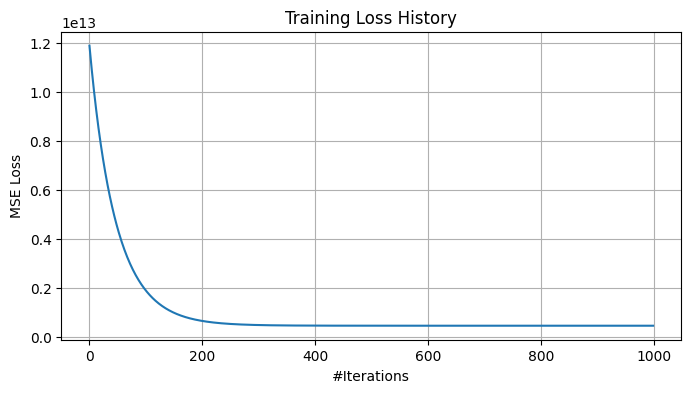

In [29]:
plt.figure(figsize=(8, 4))
sns.lineplot(loss_history)
plt.title("Training Loss History")
plt.xlabel("#Iterations")
plt.ylabel("MSE Loss")
plt.grid()
plt.show()

In [30]:
y_pred=reg.predict(X_test_scaled)

In [31]:
from sklearn import metrics
print("r2 score",metrics.r2_score(y_test,y_pred))
raise Exception("Stopping execution here")


r2 score 0.6741984939058415


Exception: Stopping execution here

SyntaxError: 'return' outside function (3438313781.py, line 1)

Now to increase the r2 score lets perform eda

In [ ]:
df2=df.copy()

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 15 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Unnamed: 0                       545 non-null    int64  
 1   price                            545 non-null    float64
 2   area                             545 non-null    int64  
 3   bedrooms                         545 non-null    int64  
 4   bathrooms                        545 non-null    float64
 5   stories                          545 non-null    int64  
 6   parking                          545 non-null    int64  
 7   mainroad_yes                     545 non-null    bool   
 8   guestroom_yes                    545 non-null    bool   
 9   basement_yes                     545 non-null    bool   
 10  hotwaterheating_yes              545 non-null    bool   
 11  airconditioning_yes              545 non-null    bool   
 12  prefarea_yes          

In [ ]:
df2.shape

(545, 15)

As we have already seen,there are no any null values there

Now lets visualize each columns and try to reduce outliers

In [ ]:
columns=df2.columns
columns

Index(['Unnamed: 0', 'price', 'area', 'bedrooms', 'bathrooms', 'stories',
       'parking', 'mainroad_yes', 'guestroom_yes', 'basement_yes',
       'hotwaterheating_yes', 'airconditioning_yes', 'prefarea_yes',
       'furnishingstatus_semi-furnished', 'furnishingstatus_unfurnished'],
      dtype='object')

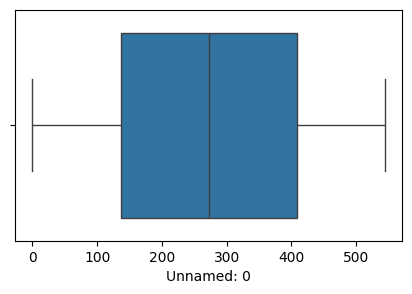

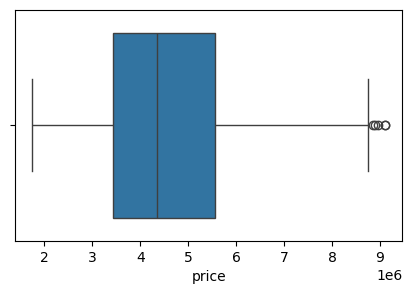

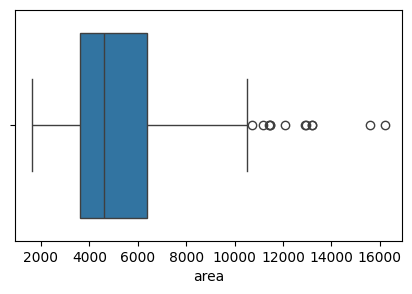

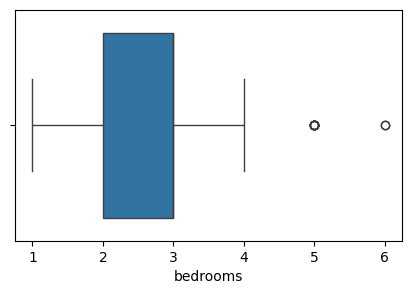

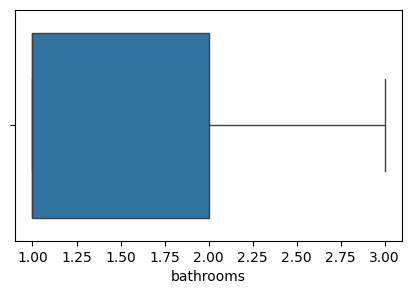

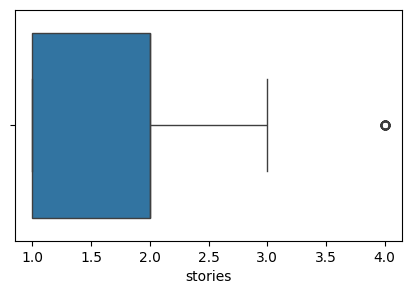

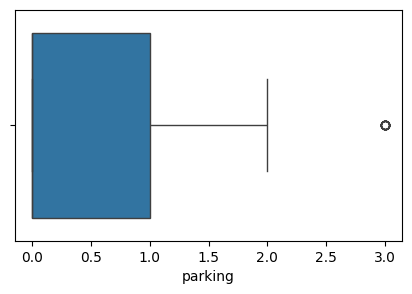

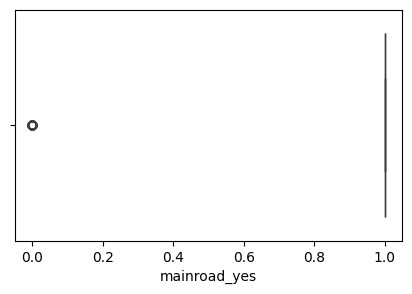

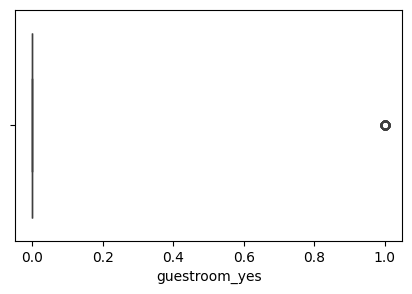

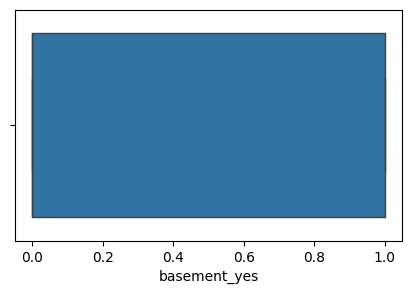

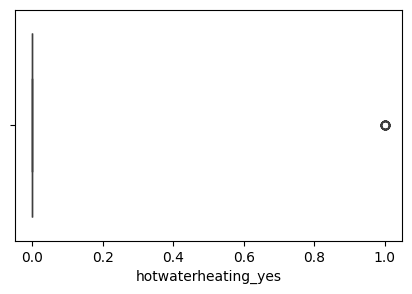

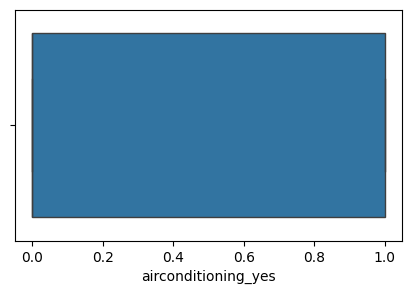

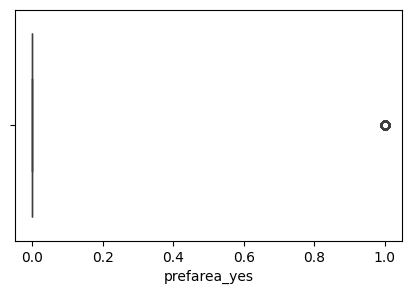

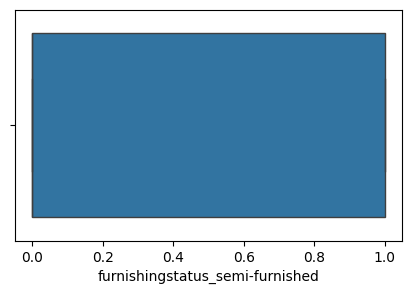

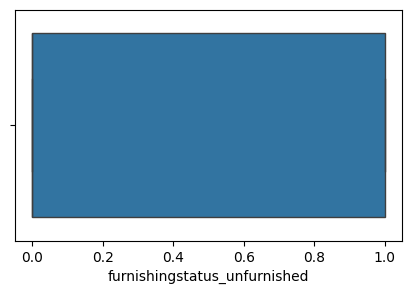

In [ ]:
for i in columns:
    plt.figure(figsize=(5, 3))
    sns.boxplot(data=df2,x=i)
    plt.show()

np.float64(0.6964505631479906)

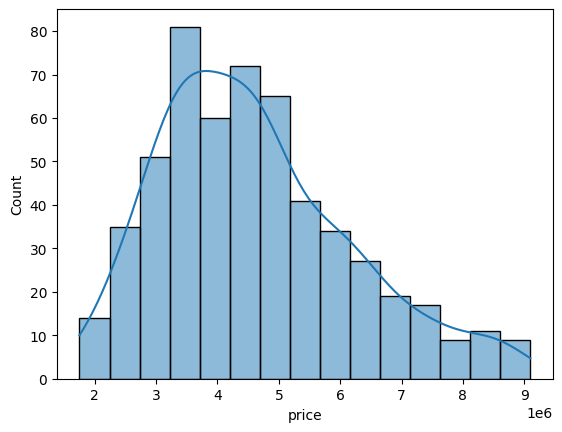

In [ ]:
sns.histplot(data=df2,x='price',kde=True)
df2['price'].skew()

Performing mean imputation to remove outliers

In [ ]:
mean=df2["price"].mean()
Q1=df2["price"].quantile(0.25)
Q3=df2["price"].quantile(0.75)
IQR=Q3-Q1

lower_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR


df2["price"]=np.where(df2["price"]<lower_limit,mean,df2["price"])
df2["price"]=np.where(df2["price"]>upper_limit,mean,df2["price"])
df2['price'].skew()


np.float64(0.6365085829729124)

<Axes: xlabel='price', ylabel='Count'>

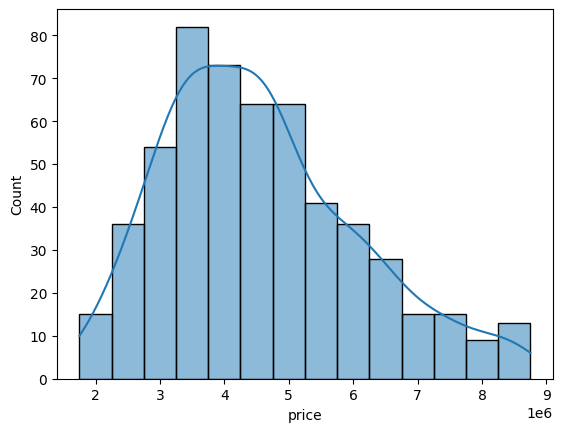

In [ ]:
sns.histplot(data=df2,x='price',kde=True)

<Axes: xlabel='price'>

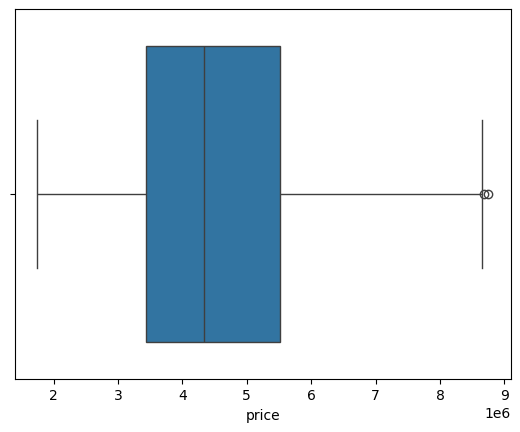

In [ ]:
sns.boxplot(data=df2,x='price')

Done for price column

Now for bathrooms

In [ ]:
df["bathrooms"].value_counts()

bathrooms
1.000000    401
2.000000    133
3.000000     10
1.286239      1
Name: count, dtype: int64

<Axes: xlabel='bathrooms', ylabel='Count'>

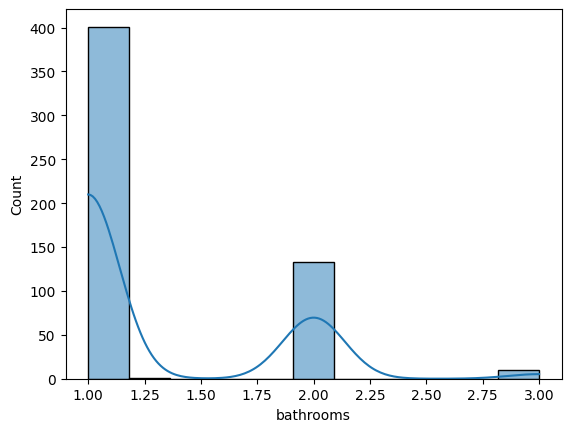

In [ ]:
sns.histplot(data=df2,x='bathrooms',kde=True)

<Axes: xlabel='bathrooms'>

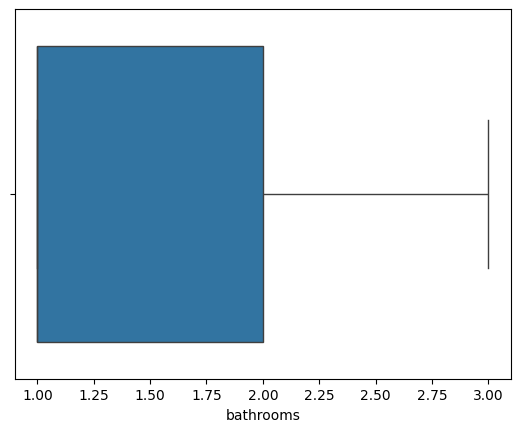

In [ ]:
sns.boxplot(data=df2,x='bathrooms')

In [ ]:
df["bathrooms"].skew()

np.float64(1.4414128693506632)

Let's perform the same for it too

In [ ]:
mean=df2["bathrooms"].mean()
Q1=df2["bathrooms"].quantile(0.25)
Q3=df2["bathrooms"].quantile(0.75)
IQR=Q3-Q1

lower_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR


df2["bathrooms"]=np.where(df2["bathrooms"]<lower_limit,mean,df2["bathrooms"])
df2["bathrooms"]=np.where(df2["bathrooms"]>upper_limit,mean,df2["bathrooms"])
df2['bathrooms'].skew()


np.float64(1.4414128693506632)

In [ ]:
df2["bathrooms"].value_counts()

bathrooms
1.000000    401
2.000000    133
3.000000     10
1.286239      1
Name: count, dtype: int64

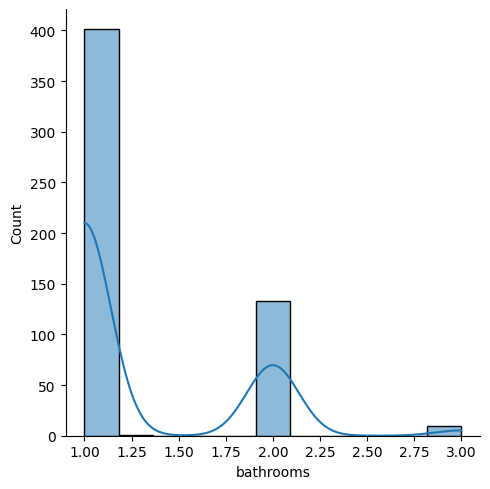

In [ ]:
sns.displot(data=df2,x='bathrooms',kde=True)

for bedrooms

In [ ]:
df2["bedrooms"].value_counts()

bedrooms
3    300
2    136
4     95
5     10
6      2
1      2
Name: count, dtype: int64

<Axes: xlabel='bedrooms', ylabel='Count'>

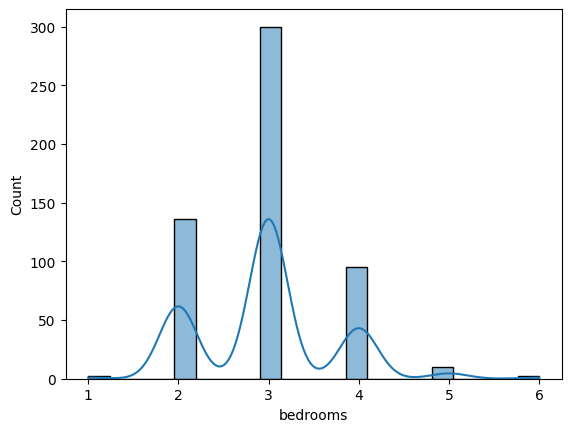

In [ ]:
sns.histplot(data=df2,x='bedrooms',kde=True)

In [ ]:
df2["bedrooms"].skew()

np.float64(0.49568394074553473)

<Axes: xlabel='bedrooms'>

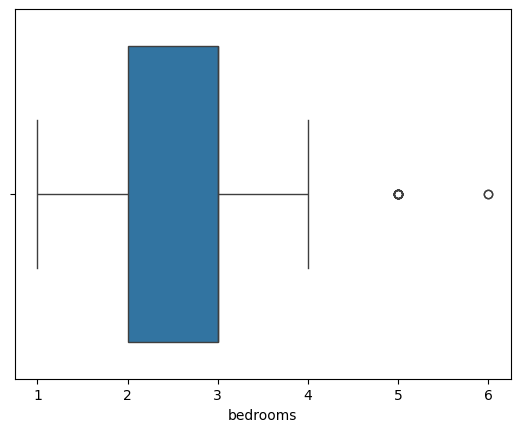

In [ ]:
sns.boxplot(data=df2,x='bedrooms')

Its okay

Lets save this data set and check for it the whole procedure

In [ ]:
df2

,Unnamed: 0,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,0,4.766729e+06,7420,4,2.000000,3,2,True,False,False,False,True,True,False,False
1,1,4.766729e+06,8960,4,1.286239,4,3,True,False,False,False,True,False,False,False
2,2,4.766729e+06,9960,3,2.000000,2,2,True,False,True,False,False,True,True,False
3,3,4.766729e+06,7500,4,2.000000,2,3,True,False,True,False,True,True,False,False
4,4,4.766729e+06,7420,4,1.000000,2,2,True,True,True,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,540,1.820000e+06,3000,2,1.000000,1,2,True,False,True,False,False,False,False,True
541,541,1.767150e+06,2400,3,1.000000,1,0,False,False,False,False,False,False,True,False
542,542,1.750000e+06,3620,2,1.000000,1,0,True,False,False,False,False,False,False,True
543,543,1.750000e+06,2910,3,1.000000,1,0,False,False,False,False,False,False,False,False


In [ ]:
df2 = df2.drop(columns=['Unnamed: 0'])

In [ ]:
df2

,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,4.766729e+06,7420,4,2.000000,3,2,True,False,False,False,True,True,False,False
1,4.766729e+06,8960,4,1.286239,4,3,True,False,False,False,True,False,False,False
2,4.766729e+06,9960,3,2.000000,2,2,True,False,True,False,False,True,True,False
3,4.766729e+06,7500,4,2.000000,2,3,True,False,True,False,True,True,False,False
4,4.766729e+06,7420,4,1.000000,2,2,True,True,True,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1.820000e+06,3000,2,1.000000,1,2,True,False,True,False,False,False,False,True
541,1.767150e+06,2400,3,1.000000,1,0,False,False,False,False,False,False,True,False
542,1.750000e+06,3620,2,1.000000,1,0,True,False,False,False,False,False,False,True
543,1.750000e+06,2910,3,1.000000,1,0,False,False,False,False,False,False,False,False


In [ ]:
#save to csv file
df2.to_csv('house_prediction2.csv',index=False)